In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from path import Path
import numpy as np

In [2]:
# File to Load 
file = "methane_hist_emissions.csv"
methane_emissions = pd.read_csv(file, index_col=0)

In [3]:
methane_emissions.head()

,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,827.98,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,824.27,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,677.00,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [4]:
# Drop unused columns
methane_emissions_df = methane_emissions.drop(columns=["Gas", "Unit"], axis =1)
methane_emissions_df.head()

,Sector,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [5]:
# Find data types
methane_emissions_df.dtypes

Sector     object
2018      float64
2017      float64
2016      float64
2015      float64
2014      float64
2013      float64
2012      float64
2011      float64
2010      float64
2009      float64
2008      float64
2007      float64
2006      float64
2005      float64
2004      float64
2003      float64
2002      float64
2001      float64
2000      float64
1999      float64
1998      float64
1997      float64
1996      float64
1995      float64
1994      float64
1993      float64
1992      float64
1991      float64
1990      float64
dtype: object

In [6]:
# Explore null emissions values
methane_emissions_df.isnull().sum()

Sector    0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
2005      0
2004      0
2003      0
2002      0
2001      0
2000      0
1999      0
1998      0
1997      0
1996      0
1995      0
1994      0
1993      0
1992      0
1991      0
1990      9
dtype: int64

In [7]:
# Create a list of countries from methane_emission_df 
countries = []
for country in methane_emissions_df.index.unique():
    countries.append(country)
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union (27)',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 

In [8]:
len(countries)

195

In [9]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [10]:
# GDP data to Load 
file = "World GDP Data.xls"
GDP = pd.read_excel(file, index_col=0)
GDP.head()

,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.123361e+11,2.207637e+11,2.202188e+11,2.340352e+11,2.390883e+11,2.696893e+11,2.684404e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10


In [11]:
# Drop unused GDP columns
GDP_df = GDP.drop(columns = ["Country Code", "Indicator Name", "Indicator Code", "2019", "2020"])
GDP_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09
Africa Eastern and Southern,2.123361e+11,2.207637e+11,2.202188e+11,2.340352e+11,2.390883e+11,2.696893e+11,2.684404e+11,2.822135e+11,2.658377e+11,2.621972e+11,...,7.125580e+11,8.474095e+11,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Africa Western and Central,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375202e+11,...,5.069964e+11,5.915830e+11,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11
Angola,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.015895e+09,5.344014e+09,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09
"Yemen, Rep.",5.647119e+09,5.930370e+09,6.463650e+09,5.368271e+09,4.167356e+09,4.258789e+09,5.785685e+09,6.838557e+09,6.325142e+09,7.641103e+09,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,1.515166e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [12]:
# Find data types
GDP_df.dtypes

1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
dtype: object

In [13]:
# Explore null GDP values
GDP_df.isnull().sum()

1990    41
1991    46
1992    42
1993    39
1994    35
1995    26
1996    26
1997    26
1998    24
1999    23
2000    19
2001    18
2002    13
2003    13
2004    13
2005    13
2006    12
2007    12
2008    11
2009    11
2010    10
2011     8
2012     9
2013     8
2014     8
2015     9
2016    10
2017    10
2018    10
dtype: int64

In [14]:
# Drop rows with countries that don't have emission data
GDP_df_same = GDP_df[GDP_df.index.isin(countries)]
GDP_df_same

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,...,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,...,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,5.070144e+10,5.155217e+10,5.423917e+10,5.562517e+10,5.930509e+10,6.574367e+10,7.357123e+10,7.883901e+10,7.567434e+10,8.444547e+10,...,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,2.269924e+13,2.368028e+13,2.538286e+13,2.582013e+13,2.787426e+13,3.104337e+13,3.173630e+13,3.161983e+13,3.153976e+13,3.273425e+13,...,6.073036e+13,6.648828e+13,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13
Samoa,1.257663e+08,1.255972e+08,1.323030e+08,1.331229e+08,2.210981e+08,2.248657e+08,2.499090e+08,2.854756e+08,2.694815e+08,2.588338e+08,...,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
South Africa,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,1.515166e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [15]:
# See what countries have probably different spelling
GDP_rest = GDP_df[~GDP_df.index.isin(countries)]
sorted(GDP_rest.index.unique())

['Africa Eastern and Southern',
 'Africa Western and Central',
 'American Samoa',
 'Arab World',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cabo Verde',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Curacao',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt, Arab Rep.',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'Faroe Islands',
 'Fragile and conflict affected situations',
 'French Polynesia',
 'Gambia, The',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Hong Kong SAR, China',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Iran, Islamic Rep.',
 '

In [16]:
# Correct spelling in GDP_df
GDP_clean = GDP_df.rename(index={'Bahamas, The': "Bahamas", 
                                 'Brunei Darussalam': "Brunei", 
                                 'Egypt, Arab Rep.': "Egypt", 
                                 'Gambia, The': 'Gambia',
                                 'Iran, Islamic Rep.': 'Iran',
                                 'Micronesia, Fed. Sts.': 'Micronesia',
                                 'Russian Federation': 'Russia',
                                 'Syrian Arab Republic': 'Syria',
                                 'Venezuela, RB': 'Venezuela',
                                 'Yemen, Rep.': 'Yemen'})

In [17]:
# Correct spelling in methate_emissions_df
methane_clean = methane_emissions_df.rename(index={'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                                                  'Kyrgyzstan': 'Kyrgyz Republic',
                                                  'Laos': 'Lao PDR',
                                                  'Republic of Congo': 'Congo, Rep.',
                                                  'Saint Kitts and Nevis': 'St. Kitts and Nevis',
                                                  'Saint Lucia': 'St. Lucia',
                                                  'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
                                                  'Slovakia': 'Slovak Republic'})

In [18]:
# Create a list of countries with corrected spelling
all_countries = []
for country in methane_clean.index.unique():
    all_countries.append(country)
sorted(all_countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union (27)',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 

In [19]:
# Drop rows with countries that don't have emission data (with corrected country names)
GDP_same = GDP_clean[GDP_clean.index.isin(all_countries)]
GDP_same

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,...,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,...,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,5.070144e+10,5.155217e+10,5.423917e+10,5.562517e+10,5.930509e+10,6.574367e+10,7.357123e+10,7.883901e+10,7.567434e+10,8.444547e+10,...,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,1.257663e+08,1.255972e+08,1.323030e+08,1.331229e+08,2.210981e+08,2.248657e+08,2.499090e+08,2.854756e+08,2.694815e+08,2.588338e+08,...,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
Yemen,5.647119e+09,5.930370e+09,6.463650e+09,5.368271e+09,4.167356e+09,4.258789e+09,5.785685e+09,6.838557e+09,6.325142e+09,7.641103e+09,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,1.515166e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [20]:
# Check for null values in GDP_same DataFrame
GDP_same.isnull().sum()

1990    22
1991    27
1992    23
1993    20
1994    17
1995     9
1996     9
1997     9
1998     9
1999     9
2000     5
2001     4
2002     3
2003     3
2004     3
2005     3
2006     3
2007     3
2008     2
2009     2
2010     1
2011     1
2012     2
2013     1
2014     1
2015     2
2016     3
2017     3
2018     3
dtype: int64

In [21]:
# Drop years with multiple missing GDP data
GDP_same.drop(columns = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999"])

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010931e+10,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,1.429049e+09,1.546926e+09,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,1.043374e+11,1.033116e+11,1.098162e+11,1.243464e+11,1.478244e+11,1.806175e+11,2.221165e+11,2.579161e+11,3.154746e+11,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,2.690197e+08,2.730884e+08,2.880789e+08,3.388386e+08,4.203202e+08,4.655680e+08,5.058324e+08,5.704692e+08,6.192607e+08,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
Yemen,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,3.161321e+11,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [22]:
# Create a list of countries from methane_clean dataframe
same_countries = []
for country in GDP_same.index.unique():
    same_countries.append(country)
sorted(same_countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union (27)',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Ice

In [23]:
# Filter methane_clean dataframe for same country names as in GDP_same dataframe
methane_same = methane_clean[methane_clean.index.isin(same_countries)]
len(methane_same.index.unique())

188

In [24]:
# Drop years with multiple missing GDP data
methane_same.drop(columns = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999"])

,Sector,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Country,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,1019.28,974.42,921.86,883.58,837.94,830.23,816.62,820.09,824.52,830.59
China,Total excluding LUCF,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,1018.91,973.58,921.56,883.36,837.67,829.70,815.91,819.89,824.17,829.61
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,776.75,798.54,792.59,783.56,767.29,756.60,723.10,671.19,643.60,623.67
Russia,Total excluding LUCF,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,774.47,793.09,791.13,780.69,765.48,752.80,719.38,669.09,642.04,617.06
China,Energy,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,552.07,510.49,468.91,427.33,385.75,371.98,358.21,344.44,330.67,316.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,Land-Use Change and Forestry,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Samoa,Fugitive Emissions,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Yemen,Industrial Processes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [25]:
# Transpose indices and column headers in methane emission dataframe
df_transposed = methane_same.copy(deep=True)
df_transposed = df_transposed.groupby([df_transposed.index,'Sector']).mean().transpose()
df_transposed.head()

Country Afghanistan                                                 \
Sector  Agriculture Energy Fugitive Emissions Industrial Processes   
2018          10.45  67.91               2.22                  0.0   
2017          10.33  66.21               2.21                  0.0   
2016          10.63  64.51               2.19                  0.0   
2015          10.85  62.82               2.18                  0.0   
2014          11.48  53.45               1.98                  0.0   

Country                                                     \
Sector  Land-Use Change and Forestry Other Fuel Combustion   
2018                             0.0                 65.69   
2017                             0.0                 64.00   
2016                             0.0                 62.32   
2015                             0.0                 60.64   
2014                             0.0                 51.47   

Country                                                     Albania  ...  \
Sector  Total excluding LUCF Total including LUCF Waste Agriculture  ...   
2018                   81.51                81.51  3.15        2.01  ...   
2017                   79.61                79.61  3.08        2.05  ...   
2016                   78.15                78.15  3.00        2.10  ...   
2015                   76.59                76.59  2.93        2.11  ...   
2014                   67.77                67.77  2.84        2.10  ...   

Country Zambia    Zimbabwe                                                 \
Sector   Waste Agriculture Energy Fugitive Emissions Industrial Processes   
2018      3.42        6.43   2.52               0.71                 0.48   
2017      3.32        6.23   2.48               0.70                 0.48   
2016      3.21        6.14   2.44               0.68                 0.48   
2015      3.10        6.64   2.40               0.66                 0.48   
2014      3.01        5.89   2.22               0.60                 0.48   

Country                                                     \
Sector  Land-Use Change and Forestry Other Fuel Combustion   
2018                            0.11                  1.81   
2017                            0.06                  1.78   
2016                            0.11                  1.76   
2015                            0.14                  1.74   
2014                            0.08                  1.61   

Country                                                  
Sector  Total excluding LUCF Total including LUCF Waste  
2018                   11.85                11.96  2.42  
2017                   11.56                11.62  2.37  
2016                   11.38                11.50  2.32  
2015                   11.79                11.93  2.27  
2014                   10.82                10.90  2.23  

[5 rows x 1685 columns]

In [26]:
# Transpose indices and column headers in GDP dataframe
gdp_transposed = GDP_same.copy(deep=True)
gdp_transposed = gdp_transposed.transpose()
gdp_transposed = gdp_transposed.rename(columns={col:(col, 'GDP') for col in gdp_transposed.columns})
gdp_transposed.head()

Country Name,"(Afghanistan, GDP)","(Angola, GDP)","(Albania, GDP)","(Andorra, GDP)","(United Arab Emirates, GDP)","(Argentina, GDP)","(Armenia, GDP)","(Antigua and Barbuda, GDP)","(Australia, GDP)","(Austria, GDP)",...,"(St. Vincent and the Grenadines, GDP)","(Venezuela, GDP)","(Vietnam, GDP)","(Vanuatu, GDP)","(World, GDP)","(Samoa, GDP)","(Yemen, GDP)","(South Africa, GDP)","(Zambia, GDP)","(Zimbabwe, GDP)"
1990,NaN,1.123628e+10,2.028554e+09,1.029048e+09,5.070144e+10,1.413524e+11,2.256839e+09,4.594704e+08,3.113267e+11,1.664634e+11,...,2.403667e+08,4.859832e+10,6.471741e+09,1.688792e+08,2.269924e+13,1.257663e+08,5.647119e+09,1.155523e+11,3.285217e+09,8.783817e+09
1991,NaN,NaN,1.099559e+09,1.106929e+09,5.155217e+10,1.897200e+11,2.069870e+09,4.817074e+08,3.259030e+11,1.737942e+11,...,2.548296e+08,5.347697e+10,9.613370e+09,2.013342e+08,2.368028e+13,1.255972e+08,5.930370e+09,1.239434e+11,3.378882e+09,8.641482e+09
1992,NaN,NaN,6.521750e+08,1.210014e+09,5.423917e+10,2.287886e+11,1.272835e+09,4.992815e+08,3.254803e+11,1.950781e+11,...,2.779556e+08,6.040180e+10,9.866990e+09,2.090888e+08,2.538286e+13,1.323030e+08,6.463650e+09,1.345452e+11,3.181922e+09,6.751472e+09
1993,NaN,NaN,1.185315e+09,1.007026e+09,5.562517e+10,2.367417e+11,1.201313e+09,5.351741e+08,3.121262e+11,1.903797e+11,...,2.863074e+08,6.006501e+10,1.318095e+10,2.004919e+08,2.582013e+13,1.331229e+08,5.368271e+09,1.471966e+11,3.273238e+09,6.563813e+09
1994,NaN,3.390500e+09,1.880952e+09,1.017549e+09,5.930509e+10,2.574400e+11,1.315159e+09,5.894296e+08,3.228073e+11,2.035352e+11,...,2.894370e+08,5.841867e+10,1.628643e+10,2.337013e+08,2.787426e+13,2.210981e+08,4.167356e+09,1.535126e+11,3.656648e+09,6.890675e+09


In [27]:
# Plot
#df_transposed.plot(kind='line', legend=False, figsize=(20,20))


In [28]:
# Merge methane and GDP transposet dataframes
merged = df_transposed.merge(gdp_transposed,how="left", right_index=True, left_index=True, validate="one_to_one")
cols = pd.MultiIndex.from_tuples([(x,y) for x,y in merged.columns])

merged = merged.transpose().reindex(cols)
merged.transpose().head()
#merged = merged.dropna(axis=0, how='any')


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


Afghanistan                                                 \
     Agriculture Energy Fugitive Emissions Industrial Processes   
2018       10.45  67.91               2.22                  0.0   
2017       10.33  66.21               2.21                  0.0   
2016       10.63  64.51               2.19                  0.0   
2015       10.85  62.82               2.18                  0.0   
2014       11.48  53.45               1.98                  0.0   

                                                                              \
     Land-Use Change and Forestry Other Fuel Combustion Total excluding LUCF   
2018                          0.0                 65.69                81.51   
2017                          0.0                 64.00                79.61   
2016                          0.0                 62.32                78.15   
2015                          0.0                 60.64                76.59   
2014                          0.0                 51.47                67.77   

                                    Albania  ...  \
     Total including LUCF Waste Agriculture  ...   
2018                81.51  3.15        2.01  ...   
2017                79.61  3.08        2.05  ...   
2016                78.15  3.00        2.10  ...   
2015                76.59  2.93        2.11  ...   
2014                67.77  2.84        2.10  ...   

     St. Vincent and the Grenadines     Venezuela       Vietnam       Vanuatu  \
                                GDP           GDP           GDP           GDP   
2018                   8.113000e+08           NaN  2.452137e+11  9.147279e+08   
2017                   7.921778e+08           NaN  2.237799e+11  8.800436e+08   
2016                   7.744296e+08           NaN  2.052762e+11  7.808896e+08   
2015                   7.554000e+08           NaN  1.932411e+11  7.308706e+08   
2014                   7.277148e+08  4.823593e+11  1.862047e+11  7.723157e+08   

             World         Samoa         Yemen  South Africa        Zambia  \
               GDP           GDP           GDP           GDP           GDP   
2018  8.626760e+13  8.212869e+08  2.160614e+10  4.048421e+11  2.631159e+10   
2017  8.119329e+13  8.320256e+08  2.684013e+10  3.814488e+11  2.587360e+10   
2016  7.630506e+13  7.994939e+08  3.131737e+10  3.235855e+11  2.095841e+10   
2015  7.511244e+13  7.879586e+08  4.244510e+10  3.467098e+11  2.125122e+10   
2014  7.955766e+13  7.568059e+08  4.322859e+10  3.811989e+11  2.714102e+10   

          Zimbabwe  
               GDP  
2018  1.811554e+10  
2017  1.758489e+10  
2016  2.054868e+10  
2015  1.996312e+10  
2014  1.949552e+10  

[5 rows x 1873 columns]

In [49]:
# Create the scaler instance
data_scaler = StandardScaler()
merged_data_scaled = data_scaler.fit_transform(merged)
merged_data_scaled[:5]
merged_data_scaled_df = pd.DataFrame(merged_data_scaled)
merged_data_scaled_df 

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.046746,-0.046722,-0.046705,-0.046715,-0.047312,-0.047410,-0.047419,-0.047725,-0.047686,-0.047910,...,-0.047132,-0.047437,-0.047334,-0.047641,-0.047622,-0.047375,-0.047480,-0.047974,-0.047911,-0.048280
1,-0.046746,-0.046722,-0.046705,-0.046715,-0.047312,-0.047410,-0.047419,-0.047725,-0.047686,-0.047910,...,-0.047132,-0.047437,-0.047334,-0.047641,-0.047622,-0.047375,-0.047480,-0.047974,-0.047911,-0.048280
2,-0.046746,-0.046722,-0.046705,-0.046715,-0.047312,-0.047410,-0.047419,-0.047725,-0.047686,-0.047910,...,-0.047132,-0.047437,-0.047334,-0.047641,-0.047622,-0.047375,-0.047480,-0.047974,-0.047911,-0.048280
3,-0.046746,-0.046722,-0.046705,-0.046715,-0.047312,-0.047410,-0.047419,-0.047725,-0.047686,-0.047910,...,-0.047132,-0.047437,-0.047334,-0.047641,-0.047622,-0.047375,-0.047480,-0.047974,-0.047911,-0.048280
4,-0.046746,-0.046722,-0.046705,-0.046715,-0.047312,-0.047410,-0.047419,-0.047725,-0.047686,-0.047910,...,-0.047132,-0.047437,-0.047334,-0.047641,-0.047622,-0.047375,-0.047480,-0.047974,-0.047911,-0.048280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,-0.046358,-0.046304,-0.046278,-0.046287,-0.046922,-0.047002,-0.047005,-0.047315,-0.047279,-0.047520,...,-0.046817,-0.047097,-0.046973,-0.047327,-0.047333,-0.047061,-0.047276,-0.047768,-0.047702,-0.048062
1869,-0.036545,-0.033240,-0.029980,-0.023655,-0.025065,-0.026019,-0.028140,-0.029538,-0.028715,-0.031144,...,-0.037843,-0.039455,-0.038688,-0.040374,-0.042164,-0.041444,-0.039248,-0.037936,-0.038034,-0.038473
1870,0.144394,0.144883,0.126113,0.141648,0.148869,0.164765,0.189149,0.206911,0.208508,0.172082,...,0.137056,0.145621,0.166317,0.157387,0.172467,0.171118,0.178243,0.160976,0.158529,0.152385
1871,-0.034323,-0.033725,-0.035512,-0.035170,-0.033344,-0.032571,-0.033530,-0.034688,-0.035247,-0.037683,...,-0.042993,-0.042973,-0.041893,-0.043123,-0.042743,-0.042171,-0.042461,-0.043032,-0.042283,-0.042575


In [45]:
print(np.mean(merged_data_scaled[:,0]))
print(np.std(merged_data_scaled[:,0]))

nan
nan


In [31]:
# Exporting merged_transposed data in csv to get null values
# merged.transpose().to_csv("merged_transposed.csv", index = False)

In [32]:
# Finding null count based on year
merged.isnull().sum()

2018     3
2017     3
2016     3
2015     2
2014     1
2013     1
2012     2
2011     1
2010     1
2009     2
2008     2
2007     3
2006     3
2005     3
2004     3
2003     3
2002     3
2001     4
2000     5
1999     9
1998     9
1997     9
1996     9
1995     9
1994    17
1993    20
1992    23
1991    27
1990    31
dtype: int64

In [33]:
# Finding null count based on country and Sector
merged.transpose().isnull().sum()

Afghanistan   Agriculture                     0
              Energy                          0
              Fugitive Emissions              0
              Industrial Processes            0
              Land-Use Change and Forestry    0
                                             ..
Samoa         GDP                             0
Yemen         GDP                             0
South Africa  GDP                             0
Zambia        GDP                             0
Zimbabwe      GDP                             0
Length: 1873, dtype: int64

In [34]:
# trying to show NaN values
selected_rows = merged.transpose()[merged.transpose().isna()]
print(selected_rows)

     Afghanistan                                                 \
     Agriculture Energy Fugitive Emissions Industrial Processes   
2018         NaN    NaN                NaN                  NaN   
2017         NaN    NaN                NaN                  NaN   
2016         NaN    NaN                NaN                  NaN   
2015         NaN    NaN                NaN                  NaN   
2014         NaN    NaN                NaN                  NaN   
2013         NaN    NaN                NaN                  NaN   
2012         NaN    NaN                NaN                  NaN   
2011         NaN    NaN                NaN                  NaN   
2010         NaN    NaN                NaN                  NaN   
2009         NaN    NaN                NaN                  NaN   
2008         NaN    NaN                NaN                  NaN   
2007         NaN    NaN                NaN                  NaN   
2006         NaN    NaN                NaN                  Na

<AxesSubplot:>

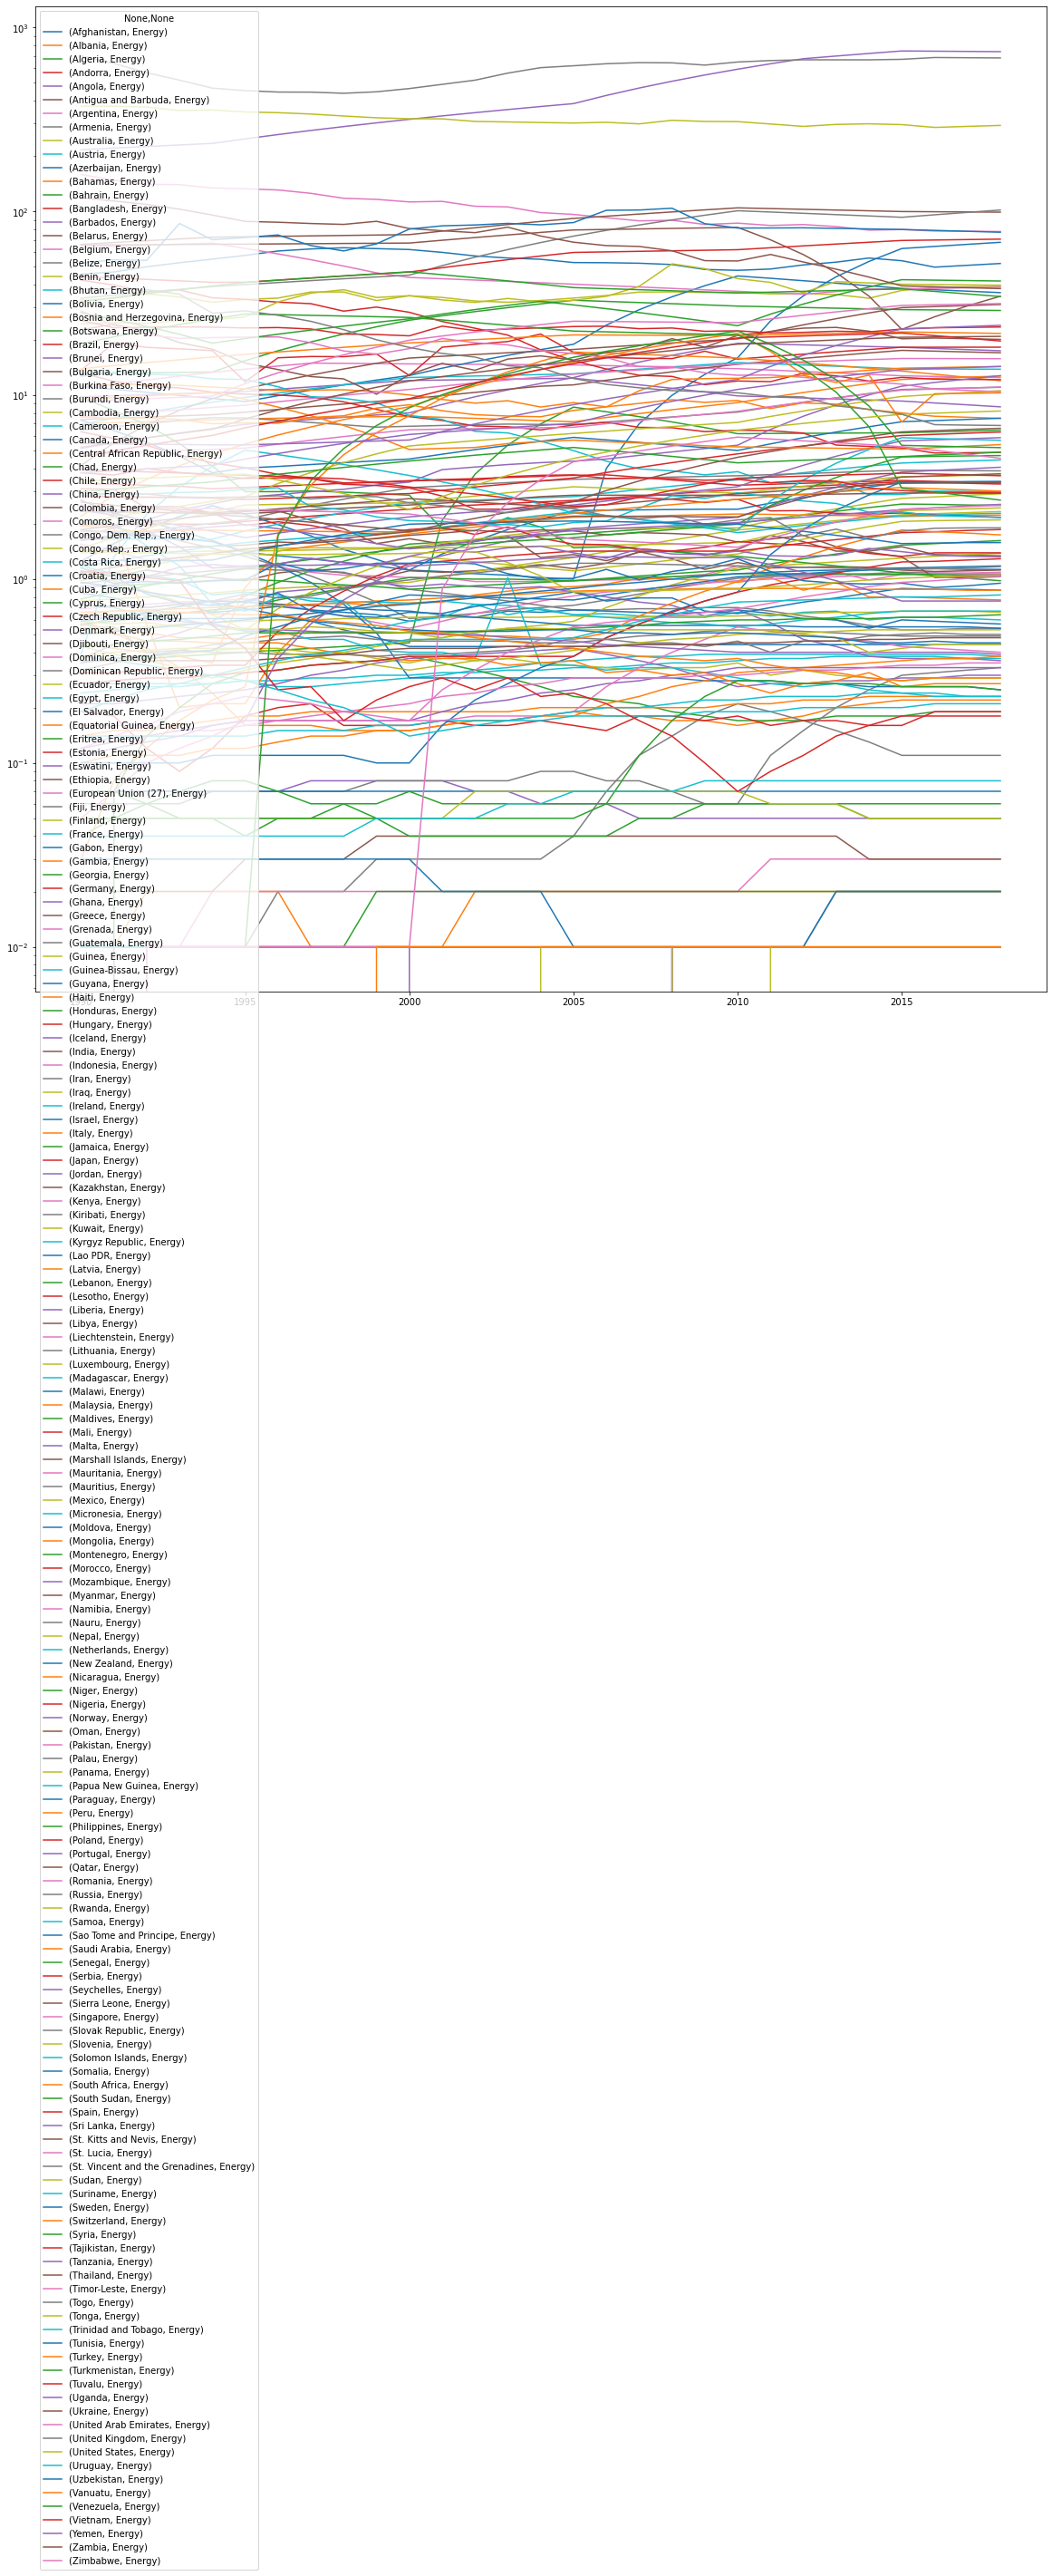

In [50]:
merged.xs('Energy', level=1, drop_level=False).iloc[:,::-1].transpose().plot(kind="line", figsize=(20,20), legend=True, logy=True)

In [53]:
merged_data_scaled.xs('1', level=0, drop_level=False).iloc[:,::-1].transpose().plot(kind="line", figsize=(20,20), legend=True, logy=True)

AttributeError: 'numpy.ndarray' object has no attribute 'xs'

In [ ]:
# See correlation between our values
merged.transpose().corr()[merged.transpose().corr()>0.7].dropna(how='all').dropna(how='all', axis=1)

In [ ]:
# Binary encoding Sector column
methane_emissions_encoded = pd.get_dummies(methane_same, columns=["Sector"])
methane_emissions_encoded.head()

In [ ]:
# set up our target variable and features
y = methane_emissions_encoded["2018"]
X = methane_emissions_encoded.drop(columns=["2018", "1990"], axis=1)

In [ ]:
# Initiate linear model
regr = linear_model.LinearRegression()
regr.fit(X, y)

In [ ]:
# Prediction
y_pred = regr.predict(X)
print(y_pred.shape)

In [ ]:
# 
print(regr.coef_)
print(regr.intercept_)

In [ ]:
merged_df = methane_same.loc[methane_same['Sector']=="Total including LUCF"].merge(GDP_same, how='inner', left_index=True, right_index=True, validate="one_to_one", suffixes=["_gdp","_meth"])
#merged_df.dropna(how='any', axis=0, inplace=True)

In [ ]:
merged_df.head()

In [ ]:
#merged_df.corr().style.bar(color="#d65f5f")

In [ ]:
# methane_emissions_df.transpose().groupby('Sector').plot(kind='line',y="1990",use_index=False, figsize=(35,10), subplots=True, sharey=True)
#methane_emissions_df.plot(kind='line', figsize=(15,10), sharex=True, sharey=True, loglog=True)